In [1]:
import pandas as pd
import numpy as np

In [2]:
strava_activities = pd.read_csv('activities.csv')

In [3]:
strava_activities.head().T

,0,1,2,3,4
Activity ID,350128633,623600149,797001969,800888948,811340614
Activity Date,"Jul 20, 2015, 1:06:57 PM","Oct 11, 2015, 10:03:14 PM","Dec 8, 2016, 4:28:12 PM","Dec 12, 2016, 10:22:44 PM","Dec 25, 2016, 10:37:32 PM"
Activity Name,Renecca creek rd,Afternoon Ride,Morning Ride,Afternoon Ride,Afternoon Ride
Activity Type,Ride,Ride,Ride,Ride,Ride
Activity Description,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>",NaN,NaN,NaN,NaN,NaN
"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>",NaN,NaN,NaN,NaN,NaN
"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>",NaN,NaN,NaN,NaN,NaN
"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>",NaN,NaN,NaN,NaN,NaN


In [4]:
strava_activities.columns 

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Gear', 'Filename',
       'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time',
       'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain',
       'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade',
       'Average Grade', 'Average Positive Grade', 'Average Negative Grade',
       'Max Cadence', 'Average Cadence', 'Max Heart Rate.1',
       'Average Heart Rate', 'Max Watts', 'Average Watts', 'Calories',
       'Max Temperature', 'Average Temperature', 'Relative Effort.1',
       'Total Work', 'Number of Runs', 'Uphill Time', 'Downhill Time',
       'Other Time', 'Perceived Exertion',
       '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>',
       '<span class="tra

In [5]:
nas = pd.DataFrame(strava_activities.isna().sum(), columns={'count_nas'})

In [6]:
nas = nas[nas.count_nas < 100]
nas

,count_nas
Activity ID,0
Activity Date,0
Activity Name,0
Activity Type,0
Elapsed Time,0
Distance,0
Commute,0
Filename,0
Elapsed Time.1,5
Moving Time,0


In [7]:
nas.index

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Elapsed Time', 'Distance', 'Commute', 'Filename', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Elevation Gain',
       'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade',
       'Average Watts', 'Calories', 'Commute.1'],
      dtype='object')

In [8]:
cleaned_activities = strava_activities[['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Elapsed Time', 'Distance', 'Filename', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Elevation Gain',
       'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade',
       'Average Watts', 'Calories']]
cleaned_activities

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Filename,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Elevation Gain,Elevation Low,Elevation High,Max Grade,Average Grade,Average Watts,Calories
0,350128633,"Jul 20, 2015, 1:06:57 PM",Renecca creek rd,Ride,2352,13.48,activities/350128633.gpx,2352.0,2272.0,13482.599609,16.000000,187.078995,283.799988,406.899994,16.799999,0.726863,NaN,NaN
1,623600149,"Oct 11, 2015, 10:03:14 PM",Afternoon Ride,Ride,5495,23.61,activities/623600149.gpx,5495.0,3965.0,23613.199219,15.100000,213.251999,283.799988,407.500000,19.900000,0.000000,150.570999,NaN
2,797001969,"Dec 8, 2016, 4:28:12 PM",Morning Ride,Ride,8,0.03,activities/797001969.gpx,8.0,8.0,30.600000,0.200000,0.000000,207.899994,207.899994,0.000000,0.000000,0.000000,NaN
3,800888948,"Dec 12, 2016, 10:22:44 PM",Afternoon Ride,Ride,7942,10.22,activities/800888948.gpx,7942.0,1851.0,10228.599609,14.500000,47.843739,208.000000,235.699997,23.799999,-0.004888,115.796242,238.987305
4,811340614,"Dec 25, 2016, 10:37:32 PM",Afternoon Ride,Ride,4983,26.16,activities/811340614.gpx,4983.0,4424.0,26168.800781,15.100000,73.213295,194.000000,244.600006,22.400000,-0.009171,121.938919,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,6785134959,"Mar 6, 2022, 10:32:28 PM",Evening Ride,Ride,6420,33.81,activities/6785134959.gpx,6420.0,5447.0,33811.339844,13.059961,156.071365,160.300003,235.500000,6.472819,0.079559,108.652359,659.889832
427,6794885409,"Mar 8, 2022, 11:48:14 PM",Evening Run,Run,1861,5.55,activities/6794885409.gpx,1861.0,1787.0,5549.040039,10.832006,11.091609,193.100006,201.899994,7.776040,0.005406,NaN,636.992432
428,6830444132,"Mar 15, 2022, 10:27:16 PM",Evening Run,Run,2130,4.75,activities/6830444132.gpx,2130.0,1533.0,4754.970215,7.133604,10.113306,190.800003,199.199997,14.962557,-0.016825,NaN,545.831909
429,6835890534,"Mar 16, 2022, 11:48:26 PM",Evening Run,Run,1591,4.43,activities/6835890534.gpx,1591.0,1504.0,4433.810059,4.489990,32.425507,203.399994,228.199997,13.831141,0.083450,NaN,516.686584


## I'm shifting my focus to the raw gpx files and see how I can compile, clean and use them in Tableau

In [9]:
# pip instal gpxpy
# This is a gpx parser library
import gpxpy
import pandas as pd

# Load gpx.
gpx_path = 'strava_test.gpx'
with open(gpx_path) as f:
    gpx = gpxpy.parse(f)

In [10]:
gpx

GPX(tracks=[GPXTrack(name='Renecca creek rd', segments=[GPXTrackSegment(points=[...])])])

In [11]:
# Convert to a dataframe one point at a time.
points = []
for segment in gpx.tracks[0].segments:
    for p in segment.points:
        points.append({
            'time': p.time,
            'latitude': p.latitude,
            'longitude': p.longitude,
            'elevation': p.elevation,
        })
strava1_df = pd.DataFrame.from_records(points)

In [12]:
strava1_df

,time,latitude,longitude,elevation
0,2015-07-20 13:06:57+00:00,29.910366,-98.352775,303.4
1,2015-07-20 13:08:26+00:00,29.910346,-98.352775,303.4
2,2015-07-20 13:08:28+00:00,29.910353,-98.352738,303.3
3,2015-07-20 13:08:30+00:00,29.910365,-98.352685,303.2
4,2015-07-20 13:08:32+00:00,29.910365,-98.352626,303.0
...,...,...,...,...
2104,2015-07-20 13:45:52+00:00,29.816008,-98.342002,400.4
2105,2015-07-20 13:45:53+00:00,29.815966,-98.341999,400.6
2106,2015-07-20 13:45:54+00:00,29.815918,-98.341995,400.9
2107,2015-07-20 13:45:59+00:00,29.815889,-98.341993,401.1


In [32]:
# pip install geopy
# a library for geographical data
import geopy.distance


# Cumulative distance.
coords = [(p.latitude, p.longitude) for p in strava1_df.itertuples()]
strava1_df['distance'] = [0] + [geopy.distance.distance(from_, to).m for from_, to in zip(coords[:-1], coords[1:])]
strava1_df['cumulative_distance'] = strava1_df.distance.cumsum()


# Timing.
strava1_df['duration'] = strava1_df.time.diff().dt.total_seconds().fillna(0)
strava1_df['cumulative_duration'] = strava1_df.duration.cumsum()
strava1_df['pace_metric'] = pd.Series((strava1_df.duration / 60) / (strava1_df.distance / 1000)).bfill()


### This is giving me the pace metric in mins per km

In [33]:
strava1_df

,time,latitude,longitude,elevation,distance,cumulative_distance,duration,cumulative_duration,pace_metric
0,2015-07-20 13:06:57+00:00,29.910366,-98.352775,303.4,0.000000,0.000000,0.0,0.0,669.066688
1,2015-07-20 13:08:26+00:00,29.910346,-98.352775,303.4,2.217019,2.217019,89.0,89.0,669.066688
2,2015-07-20 13:08:28+00:00,29.910353,-98.352738,303.3,3.656480,5.873498,2.0,91.0,9.116236
3,2015-07-20 13:08:30+00:00,29.910365,-98.352685,303.2,5.288393,11.161891,2.0,93.0,6.303112
4,2015-07-20 13:08:32+00:00,29.910365,-98.352626,303.0,5.697799,16.859691,2.0,95.0,5.850212
...,...,...,...,...,...,...,...,...,...
2104,2015-07-20 13:45:52+00:00,29.816008,-98.342002,400.4,5.777120,13462.015780,1.0,2335.0,2.884944
2105,2015-07-20 13:45:53+00:00,29.815966,-98.341999,400.6,4.664695,13466.680475,1.0,2336.0,3.572938
2106,2015-07-20 13:45:54+00:00,29.815918,-98.341995,400.9,5.334799,13472.015274,1.0,2337.0,3.124141
2107,2015-07-20 13:45:59+00:00,29.815889,-98.341993,401.1,3.220439,13475.235713,5.0,2342.0,25.876388


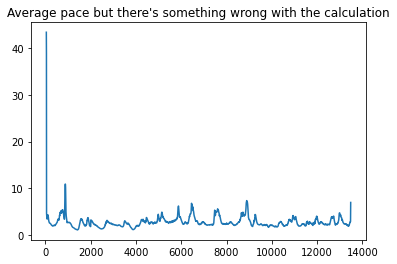

In [31]:
# pip install numpy_ext
# an extension of numpy features
from numpy_ext import rolling_apply
import matplotlib.pyplot as plt


def rolling_metric_pace(duration, distance):
    return (duration.sum() / 60) / (distance.sum() / 1000)


x = strava1_df.cumulative_distance
y = rolling_apply(rolling_metric_pace, 10, strava1_df.duration.values, strava1_df.distance.values)
plt.title("Average pace but there's something wrong with the calculation")
plt.plot(x, y)

<AxesSubplot:xlabel='cumulative_distance', ylabel='elevation'>

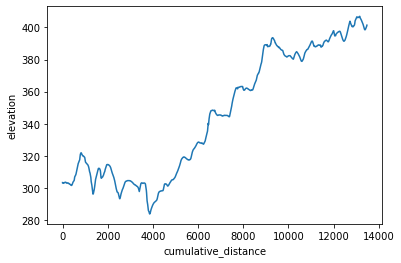

In [17]:
import seaborn as sns

sns.lineplot(data=strava1_df, x='cumulative_distance', y='elevation')

In [18]:
strava1_df.head()

,time,latitude,longitude,elevation,distance,cumulative_distance,duration,cumulative_duration,pace_metric
0,2015-07-20 13:06:57+00:00,29.910366,-98.352775,303.4,0.000000,0.000000,0.0,0.0,669.066688
1,2015-07-20 13:08:26+00:00,29.910346,-98.352775,303.4,2.217019,2.217019,89.0,89.0,669.066688
2,2015-07-20 13:08:28+00:00,29.910353,-98.352738,303.3,3.656480,5.873498,2.0,91.0,9.116236
3,2015-07-20 13:08:30+00:00,29.910365,-98.352685,303.2,5.288393,11.161891,2.0,93.0,6.303112
4,2015-07-20 13:08:32+00:00,29.910365,-98.352626,303.0,5.697799,16.859691,2.0,95.0,5.850212


In [19]:
my_first_activity = strava1_df.copy()

In [20]:
my_first_activity.to_csv('first_strava_activity_csv.csv')

In [21]:
my_first_activity.to_json('first_strava_activity_json.json')

In [22]:
# pip instal gpxpy
# This is a gpx parser library
import gpxpy
import pandas as pd

# Load gpx.
gpx_path = 'nrc_test.gpx'
with open(gpx_path) as f:
    gpx = gpxpy.parse(f)

In [23]:
# Convert to a dataframe one point at a time.
points = []
for segment in gpx.tracks[0].segments:
    for p in segment.points:
        points.append({
            'time': p.time,
            'latitude': p.latitude,
            'longitude': p.longitude,
            'elevation': p.elevation,
        })
nrc1_df = pd.DataFrame.from_records(points)

In [24]:
# pip install geopy
# a library for geographical data
import geopy.distance


# Cumulative distance.
coords = [(p.latitude, p.longitude) for p in nrc1_df.itertuples()]
nrc1_df['distance'] = [0] + [geopy.distance.distance(from_, to).m for from_, to in zip(coords[:-1], coords[1:])]
nrc1_df['cumulative_distance'] = nrc1_df.distance.cumsum()


# Timing.
nrc1_df['duration'] = nrc1_df.time.diff().dt.total_seconds().fillna(0)
nrc1_df['cumulative_duration'] = nrc1_df.duration.cumsum()
nrc1_df['pace_metric'] = pd.Series((nrc1_df.duration / 60) / (nrc1_df.distance / 1000)).bfill()


In [25]:
nrc1_df

,time,latitude,longitude,elevation,distance,cumulative_distance,duration,cumulative_duration,pace_metric
0,2020-09-07 14:48:26.276000+00:00,29.467144,-98.520179,208.061367,0.000000,0.000000,0.000,0.000,6.070325
1,2020-09-07 14:48:30.401000+00:00,29.467163,-98.520064,207.548000,11.325588,11.325588,4.125,4.125,6.070325
2,2020-09-07 14:48:34.527000+00:00,29.467169,-98.519945,222.001675,11.509995,22.835583,4.126,8.251,5.974517
3,2020-09-07 14:48:38.653000+00:00,29.467199,-98.519792,232.244961,15.221601,38.057184,4.126,12.377,4.517703
4,2020-09-07 14:48:42.779000+00:00,29.467195,-98.519684,218.982143,10.454815,48.511999,4.126,16.503,6.577511
...,...,...,...,...,...,...,...,...,...
380,2020-09-07 15:14:34.069000+00:00,29.467021,-98.520833,222.604214,10.790460,4629.977902,4.125,1567.793,6.371369
381,2020-09-07 15:14:38.195000+00:00,29.467110,-98.520789,221.961391,10.722891,4640.700794,4.126,1571.919,6.413071
382,2020-09-07 15:14:42.321000+00:00,29.467179,-98.520704,221.902431,11.216037,4651.916831,4.126,1576.045,6.131102
383,2020-09-07 15:14:46.447000+00:00,29.467210,-98.520606,NaN,10.125038,4662.041870,4.126,1580.171,6.791744


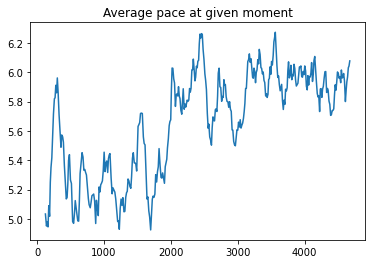

In [26]:
# pip install numpy_ext
# an extension of numpy features
from numpy_ext import rolling_apply
import matplotlib.pyplot as plt


def rolling_metric_pace(duration, distance):
    return (duration.sum() / 60) / (distance.sum() / 1000)


x = nrc1_df.cumulative_distance
y = rolling_apply(rolling_metric_pace, 10, nrc1_df.duration.values, nrc1_df.distance.values)
plt.title("Average pace at given moment")
plt.plot(x, y)

<AxesSubplot:xlabel='cumulative_distance', ylabel='elevation'>

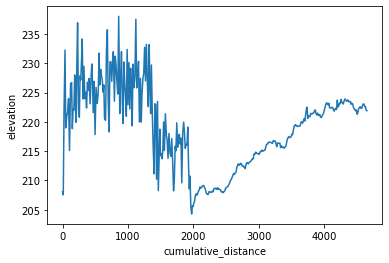

In [27]:
import seaborn as sns

sns.lineplot(data=nrc1_df, x='cumulative_distance', y='elevation')

In [38]:
nrc1_strava1_joined = nrc1_df.merge(strava1_df, how='outer')

In [39]:
nrc1_strava1_joined

,time,latitude,longitude,elevation,distance,cumulative_distance,duration,cumulative_duration,pace_metric
0,2020-09-07 14:48:26.276000+00:00,29.467144,-98.520179,208.061367,0.000000,0.000000,0.000,0.000,6.070325
1,2020-09-07 14:48:30.401000+00:00,29.467163,-98.520064,207.548000,11.325588,11.325588,4.125,4.125,6.070325
2,2020-09-07 14:48:34.527000+00:00,29.467169,-98.519945,222.001675,11.509995,22.835583,4.126,8.251,5.974517
3,2020-09-07 14:48:38.653000+00:00,29.467199,-98.519792,232.244961,15.221601,38.057184,4.126,12.377,4.517703
4,2020-09-07 14:48:42.779000+00:00,29.467195,-98.519684,218.982143,10.454815,48.511999,4.126,16.503,6.577511
...,...,...,...,...,...,...,...,...,...
2489,2015-07-20 13:45:52+00:00,29.816008,-98.342002,400.400000,5.777120,13462.015780,1.000,2335.000,2.884944
2490,2015-07-20 13:45:53+00:00,29.815966,-98.341999,400.600000,4.664695,13466.680475,1.000,2336.000,3.572938
2491,2015-07-20 13:45:54+00:00,29.815918,-98.341995,400.900000,5.334799,13472.015274,1.000,2337.000,3.124141
2492,2015-07-20 13:45:59+00:00,29.815889,-98.341993,401.100000,3.220439,13475.235713,5.000,2342.000,25.876388


In [40]:
nrc1_strava1_joined.to_csv('nrc1_strava1_joined.csv')

## Obviously, I have valid elevation data, and I will possibly wheel back around to attept a smoothing of it later.

In [ ]:
NOTEBOOK BREAK

In [ ]:
import numpy as np
import requests
import time

# get a gpxz.io api key at their website
API_KEY = 'ak_v9aliH1v_AnAPya0elV1PVx5F'

BATCH_SIZE = 50  # 512 for paid customers.

def gpxz_elevation(lats, lons):
    # add a delay timer to request, to avoid "too many requests" error
    time.sleep(1)
    elevations = []
    n_chunks = int(len(lats)//BATCH_SIZE) + 1
    lat_chunks = np.array_split(lats,n_chunks)
    lon_chunks = np.array_split(lons, n_chunks)
    for lat_chunk, lon_chunk in zip(lat_chunks, lon_chunks):
        latlons = '|'.join(f'{lat},{lon}' for lat, lon in zip(lat_chunk, lon_chunk))
        data = {
            'latlons':latlons,
        }
        response = requests.post(
            'https://api.gpxz.io/v1/elevation/points',
            headers={'x-api-key': API_KEY},
            data=data,
        )
        response.raise_for_status()
        elevations += [r['elevation'] for r in response.json()['results']]
    return elevations

df['elevation_gpxz'] = gpxz_elevation(df.latitude, df.longitude)

## The above is trying to use gpxz.io to get better elevation data (and thus, smooth my elevations, which are usually low-res in the tracking apps). However, I'm quickly running past the max number of requests per day for a free account : *(